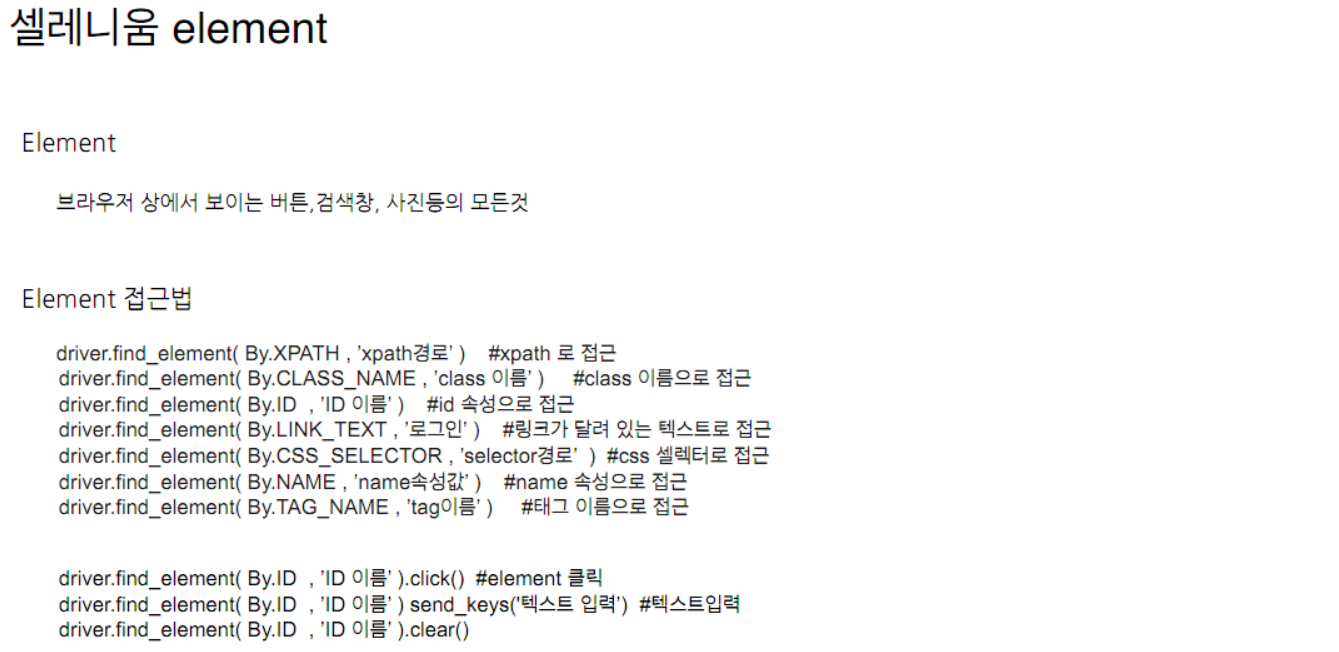

In [1]:
#pip install webdriver-manager

In [126]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import time
from tqdm import tqdm

In [67]:
driver=webdriver.Chrome('./chromedriver.exe')
url='https://www.korea.kr/totalSearch.do?srchFlag=Y&keyword=%EB%B6%80%EB%8F%99%EC%82%B0&oldKeyword=%EB%B6%80%EB%8F%99%EC%82%B0&resultKeyword=%EB%B6%80%EB%8F%99%EC%82%B0&sort=date&scnt=1&punit=10&where=news_korea_new_v2&dateRange=all&range=ALL&op=and&multiFlag=Y&news_type=pol'
driver.get(url)
time.sleep(2)

#새로운 검색어 입력
elem=driver.find_element(By.NAME,'topSearchKeyword')
elem.clear()#기존 텍스트 삭제
elem.send_keys('청년실업')
elem.send_keys(Keys.RETURN)
time.sleep(2)

#정책 뉴스로 이동
driver.find_element(By.XPATH,'//*[@id="news_korea_new_v2"]/div[1]/div/ul/li[2]/a').click()
time.sleep(2)

res=[bs(driver.page_source,'html.parser')]


#3페이지까지 페이지 소스 가져오기
pages=3
for page in range(2,pages+1):
    driver.find_element(By.LINK_TEXT,str(page)).click()
    time.sleep(2)
    tmp=driver.page_source
    res.append(bs(tmp))
    
driver.quit()

C:\Users\hmh\AppData\Local\Temp\ipykernel_24832\3795374637.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('./chromedriver.exe')


In [75]:
result=[]
for j in res:
    for i in j.select('span.text>strong>a'):
        result.append({
            '제목':i.text.replace('\t',''),
            '링크':'https://www.korea.kr'+i['href']
        })

df=pd.DataFrame(result)
display(df)

,제목,링크
0,\n민간 중심 일자리 창출…노동시장 개혁으로 공정채용 확산한다\n,https://www.korea.kr/news/policyNewsView.do?ne...
1,"\n정부, 8000억원 규모 추가 민생 대책···취약계층 지원 확대\n",https://www.korea.kr/news/policyNewsView.do?ne...
2,\n‘국민취업지원제도’ 지원대상 확대 등 취업지원서비스 내실화\n,https://www.korea.kr/news/policyNewsView.do?ne...
3,\n5월 취업자 93만5000명 증가…같은 달 기준 22년만에 최대\n,https://www.korea.kr/news/policyNewsView.do?ne...
4,\n보편적 문화 복지 실현…K-컬처의 초격차 산업화\n,https://www.korea.kr/news/policyNewsView.do?ne...
5,\n공정한 노사관계 구축…상생의 노동시장 만든다\n,https://www.korea.kr/news/policyNewsView.do?ne...
6,\n필요한 국민 더 두텁게 지원…누구도 홀로 뒤처지지 않게\n,https://www.korea.kr/news/policyNewsView.do?ne...
7,\n4월 취업자 86만5000명 증가…같은달 기준 22년만에 최대\n,https://www.korea.kr/news/policyNewsView.do?ne...
8,\n문답으로 알아본 ‘저소득 청년 월세지원’ 사업\n,https://www.korea.kr/news/policyNewsView.do?ne...
9,\n3월 취업자 83만1000명↑…20년만에 최대폭 증가\n,https://www.korea.kr/news/policyNewsView.do?ne...


In [121]:
res_lst=[]

for i in df['링크']:
    html=requests.get(i)
    soup=bs(html.text,'html.parser')
    title=soup.select_one('div.article-head>h1').text
    date=soup.select('div.article-head div.info span')[0].text
    writer=soup.select('div.article-head div.info span')[1].text
    contents=soup.find('div','view-cont').text
    temp={
        '제목':title,
        '작성일':date,
        '작성자':writer,
        '내용':contents
    }
    res_lst.append(temp)

In [124]:
df_lst=pd.DataFrame(res_lst)
display(df_lst)

,제목,작성일,작성자,내용
0,민간 중심 일자리 창출…노동시장 개혁으로 공정채용 확산한다,2022.07.15,고용노동부,\n고용노동부가 새 정부 핵심정책과제로 ▲노동시장 개혁 ▲중대산업재해 감축 ▲적극적...
1,"정부, 8000억원 규모 추가 민생 대책···취약계층 지원 확대",2022.07.08,기획재정부,\n정부가 6%대인 소비자물가 상승률을 감안해 8000억원 규모의 추가 민생 대책을...
2,‘국민취업지원제도’ 지원대상 확대 등 취업지원서비스 내실화,2022.06.27,고용노동부,\n정부가 지난 6월22일 고용정책심의회에서 의결된 ‘제1차 국민취업지원 기본계획’...
3,5월 취업자 93만5000명 증가…같은 달 기준 22년만에 최대,2022.06.15,기획재정부·통계청,\n5월 취업자수가 1년 전보다 90만명 넘게 늘면서 같은달 기준으로 22년만에 최...
4,보편적 문화 복지 실현…K-컬처의 초격차 산업화,2022.06.08,정책브리핑 원세연,"\n5월 10일 출범한 윤석열정부는 국정비전을 ‘다시 도약하는 대한민국, 함께 잘 ..."
5,공정한 노사관계 구축…상생의 노동시장 만든다,2022.06.07,정책브리핑 신주희,"\n5월 10일 출범한 윤석열정부는 국정비전을 ‘다시 도약하는 대한민국, 함께 잘 ..."
6,필요한 국민 더 두텁게 지원…누구도 홀로 뒤처지지 않게,2022.05.17,정책브리핑 신주희,"\n5월 10일 출범한 윤석열정부는 국정비전을 ‘다시 도약하는 대한민국, 함께 잘 ..."
7,4월 취업자 86만5000명 증가…같은달 기준 22년만에 최대,2022.05.11,통계청·기획재정부,\n4월 취업자 수가 1년 전보다 80만명 넘게 늘면서 같은 달 기준으로 22년 만...
8,문답으로 알아본 ‘저소득 청년 월세지원’ 사업,2022.04.21,국토교통부,\n정부가 코로나19 장기화 등으로 인한 저소득 청년층의 주거비 부담을 덜어주기 위...
9,3월 취업자 83만1000명↑…20년만에 최대폭 증가,2022.04.13,통계청·기획재정부,\n3월 취업자 수가 1년 전보다 80만명 넘게 늘었다.\n고용률은 역대 최고 수준...


In [125]:
df_lst['내용'][0]

'\n고용노동부가 새 정부 핵심정책과제로 ▲노동시장 개혁 ▲중대산업재해 감축 ▲적극적 노동시장 정책 강화를 집중 추진한다.\n취약계층 권익 보호를 위해 청년 공정채용을 넓히고 임금체불 근절에도 나선다. 10월 중에는 자율 예방체계 구축을 위한 중대재해감축 로드맵을 마련한다.\n또\xa02024년까지 디지털·반도체 현장인력 18만 명을 양성하고, 5만명의 외국인력을 신속히 입국시킨다.\n오는 9월에는 청년 일경험 활성화 로드맵을 마련하고 4분기 중에 국가 고용서비스 전달체계 혁신방안을 발표할 계획이다.\n이정식 고용노동부 장관은\xa015일 윤석열 대통령에게 이같은\xa0업무계획을 보고하며\xa0산업화 시대의 노동규범·관행은 과감히 혁신하고 노동시장의 구조적 문제를 해결하기 위한 노동시장 개혁을 추진하겠다고 밝혔다.\n이정식 고용노동부 장관(왼쪽)이 용산 대통령실에서 윤석열 대통령에게 업무보고를 진행하고 있다. (사진=대통령실) \n◆ 노동시장 개혁\n근로시간과 임금체계 개편을 위한 전문가 중심 미래 노동시장 연구회를 운영하고, 그 결과를 토대로 입법 등 후속 조치를 속도감 있게 추진해 나간다.\n근로시간은 기본적으로는 단축해 나간다는 기조 하에서 노사의 자율적 선택권을 확대하되, 근로자에 대한 건강보호조치를 병행하는 등 합리적 대안을 마련한다.\n임금체계는 노사 자율 영역이지만 공정한 보상 시스템 확산으로 청년 일자리 창출과 고령자 계속고용의 기반을 마련할 수 있도록 개편한다.\n노동시장 현장의 갈등은 대화와 타협을 통한 노사 자율적 해결 기조를 확립하지만 불법점거, 채용강요, 부당노동행위 등 불법행위에 대해서는 법과 원칙에 따라 노사불문 엄정 대응할 방침이다.\n이밖에도 국민 개개인이 불합리한 관행 개선을 체감할 수 있도록 청년·미조직·저임금 근로자 권익은 두텁게 보호하고, 청년 공정채용 확산을 위한 지도·점검 및 제도개선을 추진한다.\n특히 청년 아르바이트생 등 노동권 보호의 사각지대에 놓일 위험이 있는 분야를 중심으로 취약계층 근로환경에 대해 집중적인 지